<a href="https://colab.research.google.com/github/fjprcosta/Projeto-de-ML/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

In [2]:
pip install pillow==9.0.0

In [3]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import urllib.request

In [4]:
# Download e extração da base de dados
url = "https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip"
data_dir = "cats_and_dogs_dataset"
zip_path = "dataset.zip"

In [5]:
if not os.path.exists(data_dir):
    print("Baixando o dataset...")
    urllib.request.urlretrieve(url, zip_path)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    os.remove(zip_path)
    print("Download e extração concluídos!")
else:
    print("Dataset já está disponível.")


Dataset já está disponível.


In [6]:
# Diretórios
base_dir = os.path.join(data_dir, "PetImages")
train_dir = os.path.join(base_dir, "Train")
val_dir = os.path.join(base_dir, "Validation")

In [7]:
# Parâmetros
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

In [8]:
# Pré-processamento e data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [9]:
# Carregando MobileNetV2 sem a última camada
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congela o modelo base

In [10]:
# Adicionando camadas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=out)

In [11]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Treinamento do modelo
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
151/625 ━━━━━━━━━━━━━━━━━━━━ 6:55 877ms/step - accuracy: 0.8626 - loss: 0.3090

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.9079 - loss: 0.2149 - val_accuracy: 0.9454 - val_loss: 0.1255
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 743s 1s/step - accuracy: 0.9409 - loss: 0.1358 - val_accuracy: 0.9530 - val_loss: 0.1174
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.9485 - loss: 0.1278 - val_accuracy: 0.9510 - val_loss: 0.1150
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 668s 1s/step - accuracy: 0.9506 - loss: 0.1201 - val_accuracy: 0.9534 - val_loss: 0.1106
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 664s 1s/step - accuracy: 0.9525 - loss: 0.1136 - val_accuracy: 0.9498 - val_loss: 0.1153
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 677s 1s/step - accuracy: 0.9520 - loss: 0.1144 - val_accuracy: 0.9488 - val_loss: 0.1204
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.9482 - loss: 0.1239 - val_accuracy: 0.9560 - val_loss: 0.1065
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.9556 - loss: 0.1146 - val_accuracy: 0.953

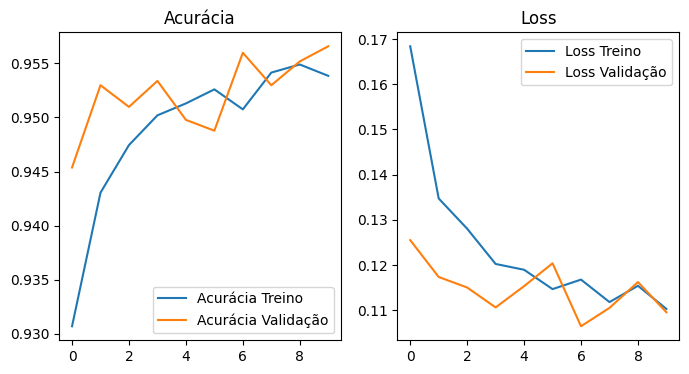

Treinamento concluído!


In [14]:
# Avaliação do modelo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia Treino')
plt.plot(epochs_range, val_acc, label='Acurácia Validação')
plt.legend(loc='lower right')
plt.title('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Treino')
plt.plot(epochs_range, val_loss, label='Loss Validação')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

print("Treinamento concluído!")